In [ ]:
# Deletes the first 5 rows from .txt file because they contain useless information.
# Then save it to a new file.

file = open('games_original.txt', "r")
lines = file.readlines()
file.close()

for i in range(5):
    del lines[0]

new_file = open("games.txt", "w+")

for line in lines:
    new_file.write(line)
new_file.close()

In [1]:
# DO NOT WORRY THIS STEP TAKES A LOT OF TIME BECAUSE OF THE FILE SIZE(2.5GB).
# Reading in the data and converting it to a Pandas dataframe.

import pandas as pd

raw_data = pd.read_csv('games.txt', delimiter=" ### ", header=None)

column_names = ["#", "date", "result", "welo", "belo", "len", "date_c", "resu_c", "welo_c", "belo_c", "edate_c", "setup", "fen", "resu2_c", "oyrange", "bad_len", "DELETE THIS"]
data = pd.DataFrame(raw_data[0].str.split(" ").to_list(), columns=column_names)

data.drop(['DELETE THIS'], axis=1, inplace=True)

data = pd.concat([data, raw_data[1]], axis=1)
data = data.rename(columns = {1: 'moves'}, inplace = False)
data['len'] = data['len'].astype(int)
data.head(5)

<ipython-input-1-54093da0ad98>:6: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  raw_data = pd.read_csv('games.txt', delimiter=" ### ", header=None)


,#,date,result,welo,belo,len,date_c,resu_c,welo_c,belo_c,edate_c,setup,fen,resu2_c,oyrange,bad_len,moves
0,1,2000.03.14,1-0,2851,None,67,date_false,result_false,welo_false,belo_true,edate_true,setup_false,fen_false,result2_false,oyrange_false,blen_false,W1.d4 B1.d5 W2.c4 B2.e6 W3.Nc3 B3.Nf6 W4.cxd5 ...
1,2,2000.03.14,1-0,2851,None,53,date_false,result_false,welo_false,belo_true,edate_true,setup_false,fen_false,result2_false,oyrange_false,blen_false,W1.e4 B1.d5 W2.exd5 B2.Qxd5 W3.Nc3 B3.Qa5 W4.d...
2,3,1999.11.20,1-0,2851,None,57,date_false,result_false,welo_false,belo_true,edate_false,setup_false,fen_false,result2_false,oyrange_false,blen_false,W1.e4 B1.e5 W2.Nf3 B2.Nc6 W3.Bc4 B3.Bc5 W4.c3 ...
3,4,1999.11.20,1-0,2851,None,49,date_false,result_false,welo_false,belo_true,edate_false,setup_false,fen_false,result2_false,oyrange_false,blen_false,W1.e4 B1.d5 W2.exd5 B2.Qxd5 W3.Nc3 B3.Qa5 W4.d...
4,5,2000.02.20,1/2-1/2,2851,2633,97,date_false,result_false,welo_false,belo_false,edate_false,setup_false,fen_false,result2_false,oyrange_false,blen_false,W1.e4 B1.e5 W2.Nf3 B2.Nc6 W3.Bb5 B3.a6 W4.Ba4 ...


In [2]:
data.columns

Index(['#', 'date', 'result', 'welo', 'belo', 'len', 'date_c', 'resu_c',
       'welo_c', 'belo_c', 'edate_c', 'setup', 'fen', 'resu2_c', 'oyrange',
       'bad_len', 'moves'],
      dtype='object')

In [79]:
import numpy as np

# Data cleaning.
# Removing columns and rows that are useless to use.
data.drop(data[data["setup"] != "setup_false"].index, inplace=True)
data.drop(['resu_c', 'welo_c', 'belo_c', 'setup', 'fen', 'oyrange', 'bad_len', 'resu2_c', 'edate_c', 'date_c'], axis=1, inplace=True)
data.drop(data[data.result == "*"].index, inplace=True) # Remove all rows where the result is "*", meaning that the result is corrupted or missing.
data.drop(data[data.len < 4].index, inplace=True) # Removing all rows where the len is smaller than 4.

# Changing datatypes
data.welo = data.welo.replace("None", np.nan)
data.belo = data.belo.replace("None", np.nan)
data.welo = data.welo.astype("float")
data.belo = data.belo.astype("float")

data.head()

KeyError: 'setup'

In [132]:
rcParams["figure.figsize"] = 12, 12
#plt.scatter(data["welo"], data["belo"])
#plt.xlabel("White elo")
#plt.ylabel("Black elo")

import seaborn as sns

elo_ranges = [[0, 500], [501, 1000], [1001, 1500], [1501, 2000], [2001, 2500], [2501, 3000], ["None", "None"]]

# White elo ranges on x
# Black elo ranges on y
x_columns = [str(x[0]) + "-" + str(x[1]) for x in elo_ranges]
y_columns = [str(x[0]) + "-" + str(x[1]) for x in elo_ranges]
elo_clusters = pd.DataFrame(columns=x_columns, index=y_columns)
elo_clusters["0-500"]["501-1000"] = 1
elo_clusters
print(elo_clusters.columns)

dataset = data

for white_elo_range in elo_ranges:
    for black_elo_range in elo_ranges:
        white_elo = str(white_elo_range[0]) + "-" + str(white_elo_range[1])
        black_elo = str(black_elo_range[0]) + "-" + str(black_elo_range[1])
        min_elo_w = white_elo_range[0]
        max_elo_w = white_elo_range[1]
        min_elo_b = black_elo_range[0]
        max_elo_b = black_elo_range[1]
        if white_elo == "None-None":
            white_count = dataset.welo.isnull()
        else:
            white_count = (dataset["welo"] >= min_elo_w) & (dataset["welo"] < max_elo_w)
        
        if black_elo == "None-None":
            black_count = dataset.belo.isnull()
        else:
            black_count = (dataset["belo"] < max_elo_b) & (dataset["belo"] >= min_elo_b)
           
        count = len(dataset[white_count & black_count])
        
        elo_clusters[white_elo][black_elo] = count

elo_clusters


#rcParams['figure.figsize'] = 7, 7
#tab = pd.crosstab(mini["welo"],mini["belo"])
#sns.heatmap(tab, annot=True, fmt="d")
#plt.ylabel("Cluster")

Index(['0-500', '501-1000', '1001-1500', '1501-2000', '2001-2500', '2501-3000',
       'None-None'],
      dtype='object')


,0-500,501-1000,1001-1500,1501-2000,2001-2500,2501-3000,None-None
0-500,106,143,163,92,66,1,126
501-1000,144,1855,3232,664,48,1,1661
1001-1500,133,3131,21205,20151,1664,65,3890
1501-2000,109,621,19433,118932,71880,907,19325
2001-2500,62,53,1588,69140,1185127,135548,266228
2501-3000,2,0,39,711,131004,118458,8468
None-None,135,1694,4012,19743,273912,10418,965401


In [4]:
## Suure dataseti subset. Lihtsam jooksutada erinevaid algosid jne.
mini = data.head(1000)

In [ ]:
#MITTE KUSTUTADA
#PRIIT PÄRN TEGELEB SELLEGA
data_copy = data.copy(deep=True)
data_copy.drop(['date', 'welo', 'belo', 'len'], axis=1, inplace=True)
data_copy.drop(data_copy[data_copy.result == "1/2-1/2"].index, inplace=True) # Remove all rows where the game ended in a draw.
data_copy.head()

In [ ]:
#MITTE KUSTUTADA
#PRIIT PÄRN TEGELEB SELLEGA
winnersMoves = []
for index, row in data_copy.iterrows():
    if (row['result'] == "1-0"): # If the white player won.
        movesWithQueue = row['moves'].split(" ")
        moves = ""
        i = 0
        for moveWithQueue in movesWithQueue:
            if (i == 5):
                break
            if (moveWithQueue[0] == "W"):
                move = moveWithQueue.split(".")
                moves += " "
                moves += move[1]
                i += 1
        winnersMoves.append(moves)
    else: # If the black player won.
        movesWithQueue = row['moves'].split(" ")
        moves = ""
        j = 0
        for moveWithQueue in movesWithQueue:
            if (j == 5):
                break
            if (moveWithQueue[0] == "B"):
                move = moveWithQueue.split(".")
                moves += " "
                moves += move[1]
                j += 1
                
        winnersMoves.append(moves)

winnerMovesDataFrame = pd.DataFrame(data=winnersMoves, columns = ['Moves'])
winnerMovesDataFrame.head()

print(winnerMovesDataFrame["Moves"].value_counts())

0-500
501-1000
1001-1500
1501-2000
2001-2500
2501-3000


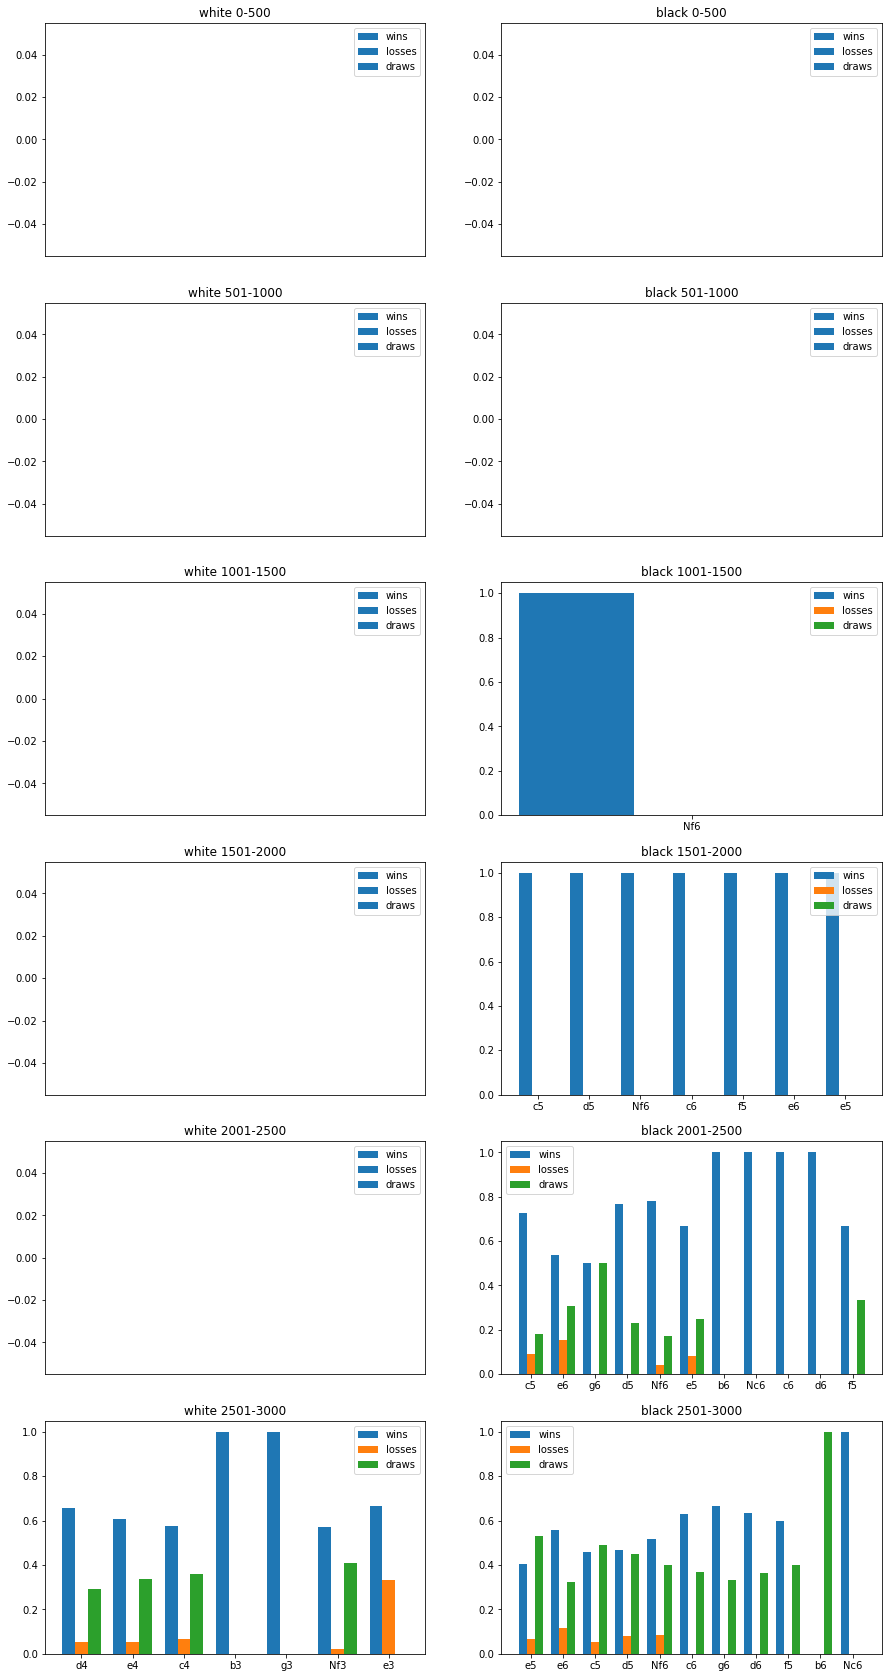

In [134]:
## JOOOOOOOOOSEP TEB 

from matplotlib import rcParams
import matplotlib.pyplot as plt

## Goal 4: Find out the main differences in moves according to elo.

rcParams["figure.figsize"] = 15, 30
subplot_index = 1
elo_ranges = [[0, 500], [501, 1000], [1001, 1500], [1501, 2000], [2001, 2500], [2501, 3000]]

dataset = mini

for elo_range in elo_ranges:
    min_elo = elo_range[0]
    max_elo = elo_range[1]
    elo = str(min_elo) + "-" + str(max_elo)
    print(elo)
    
    white_moves = []
    white_results = []
    black_moves = []
    black_results = []

    for index, row in dataset.iterrows():
        if row.welo >= min_elo and row.welo < max_elo:
            first_move = row.moves.split(" ")[0].split(".")[1] # white's move
            result = row.result
            white_moves.append(first_move)
            white_results.append(result)
        if row.belo >= min_elo and row.belo < max_elo:
            first_move = row.moves.split(" ")[1].split(".")[1] # black's move
            result = row.result
            black_moves.append(first_move)
            black_results.append(result)
    
    white_moves_df = pd.DataFrame({"result": white_results, "move": white_moves})
    white_moves = white_moves_df.move.unique()
    white_winrates = pd.DataFrame({"wins": [len(white_moves_df[(white_moves_df["move"]==move) & (white_moves_df["result"]=="1-0")]) for move in white_moves],
                             "losses": [len(white_moves_df[(white_moves_df["move"]==move) & (white_moves_df["result"]=="0-1")]) for move in white_moves],
                             "draws": [len(white_moves_df[(white_moves_df["move"]==move) & (white_moves_df["result"]=="1/2-1/2")]) for move in white_moves],
                                  "total_games": [len(white_moves_df[(white_moves_df["move"]==move)])for move in white_moves]},
                            index=white_moves)
    
    black_moves_df = pd.DataFrame({"result": black_results, "move": black_moves})
    black_moves = black_moves_df.move.unique()
    black_winrates = pd.DataFrame({"wins": [len(black_moves_df[(black_moves_df["move"]==move) & (black_moves_df["result"]=="1-0")])for move in black_moves],
                             "losses": [len(black_moves_df[(black_moves_df["move"]==move) & (black_moves_df["result"]=="0-1")])for move in black_moves],
                             "draws": [len(black_moves_df[(black_moves_df["move"]==move) & (black_moves_df["result"]=="1/2-1/2")])for move in black_moves],
                                  "total_games": [len(black_moves_df[(black_moves_df["move"]==move)])for move in black_moves]},
                            index=black_moves)
        
    # Plot for white
    width = 0.25
    bars1 = np.arange(len(white_moves))
    bars2 = [x + width for x in bars1]
    bars3 = [x + width for x in bars2]
    
    wins = [row.wins / row.total_games for idx,row in white_winrates.iterrows()]
    losses = [row.losses / row.total_games for idx,row in white_winrates.iterrows()]
    draws = [row.draws / row.total_games for idx,row in white_winrates.iterrows()]
    
    # Sketchy but maybe works
    if not wins:
        wins = [0]
    if not losses:
        losses = [0]
    if not draws:
        draws = [0]
        
    plt.subplot(6, 2, subplot_index)
    plt.bar(bars1, wins, width=width, label="wins")
    plt.bar(bars2, losses, width=width, label="losses")
    plt.bar(bars3, draws, width=width, label="draws")
    plt.title("white " + elo)
    plt.xticks([x + width for x in range(len(white_moves))], white_moves)
    subplot_index += 1
    plt.legend()
    
    # Plot for black
    width = 0.25
    bars1 = np.arange(len(black_moves))
    bars2 = [x + width for x in bars1]
    bars3 = [x + width for x in bars2]

    wins = [row.wins / row.total_games for idx,row in black_winrates.iterrows()]
    losses = [row.losses / row.total_games for idx,row in black_winrates.iterrows()]
    draws = [row.draws / row.total_games for idx,row in black_winrates.iterrows()]
    
    # Sketchy but maybe works
    if not wins:
        wins = [0]
    if not losses:
        losses = [0]
    if not draws:
        draws = [0]
        
    plt.subplot(6, 2, subplot_index)
    plt.bar(bars1, wins, width=width, label="wins")
    plt.bar(bars2, losses, width=width, label="losses")
    plt.bar(bars3, draws, width=width, label="draws")
    plt.title("black " + elo)
    plt.xticks([x + width for x in range(len(black_moves))], black_moves)
    subplot_index += 1
    plt.legend()

In [9]:
print(black_winrates)

## Võiks välja jätta käigud, mida on tehtud vähem kui 5%

     wins  losses  draws  total_games
e5     60      10     79          149
e6     24       5     14           43
c5     58       7     62          127
d5     47       8     45          100
Nf6    67      11     52          130
c6     12       0      7           19
g6      2       0      1            3
d6      7       0      4           11
f5      3       0      2            5
b6      0       0      1            1
Nc6     2       0      0            2


0-500
501-1000
1001-1500
1501-2000
2001-2500
2501-3000


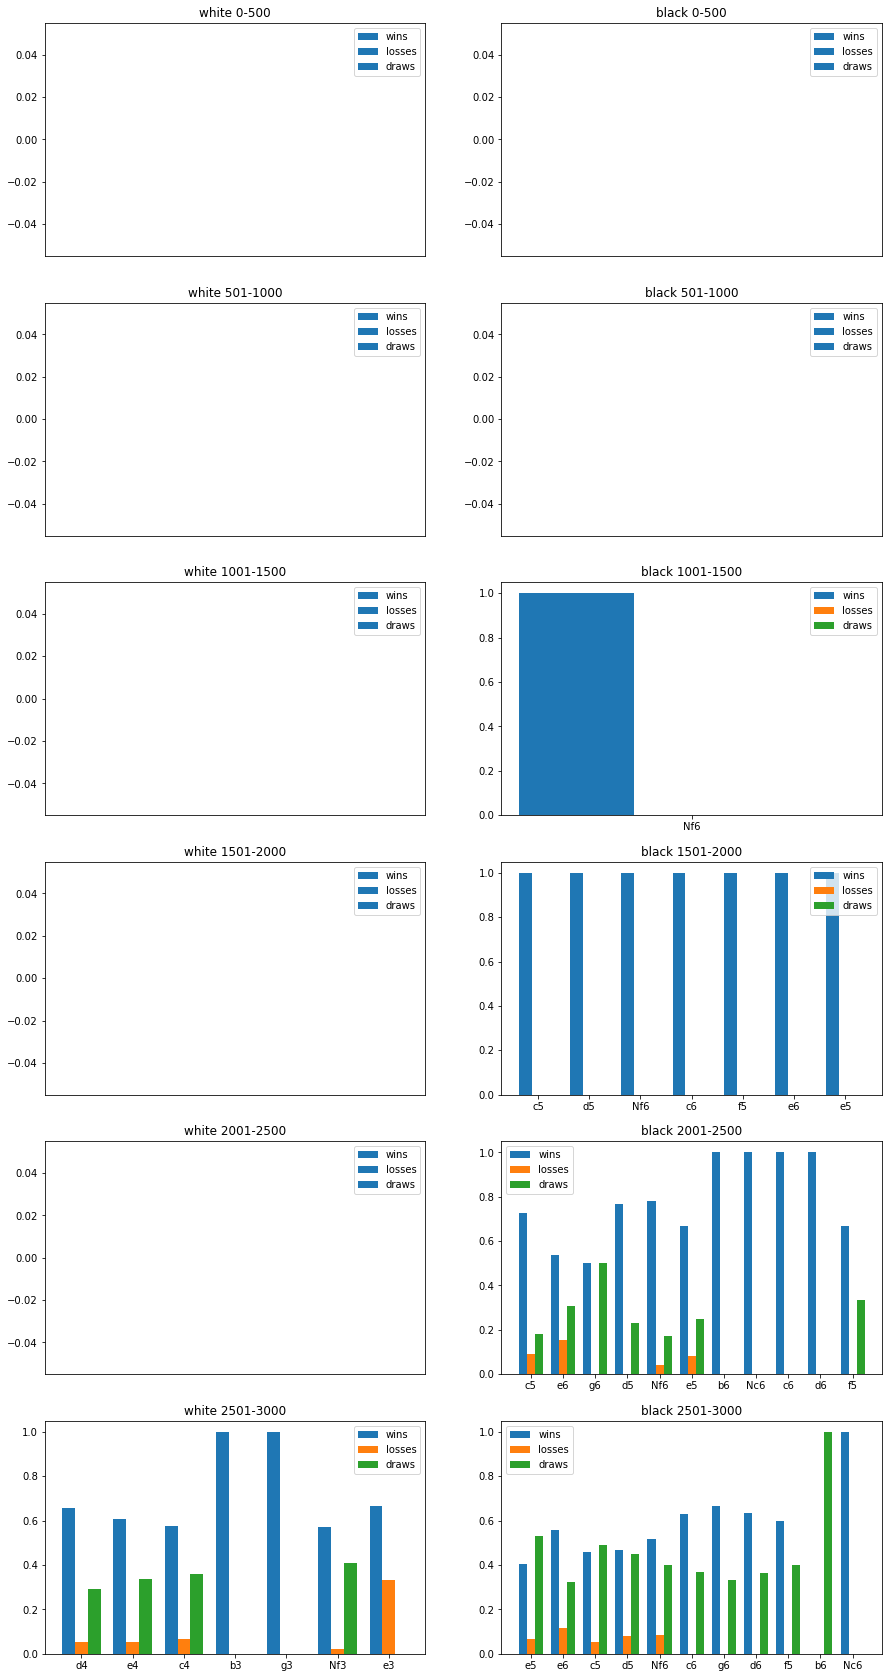

In [19]:
rcParams["figure.figsize"] = 15, 30
subplot_index = 1
elo_ranges = [[0, 500], [501, 1000], [1001, 1500], [1501, 2000], [2001, 2500], [2501, 3000]]

for elo_range in elo_ranges:
    min_elo = elo_range[0]
    max_elo = elo_range[1]
    elo = str(min_elo) + "-" + str(max_elo)
    print(elo)
    
    white_moves = []
    white_results = []
    black_moves = []
    black_results = []

    for index, row in mini.iterrows():
        if row.welo >= min_elo and row.welo < max_elo:
            first5_moves = row.moves.split(" ")[0].split(".")[1] # white's move
            result = row.result
            white_moves.append(first5_moves)
            white_results.append(result)
        if row.belo >= min_elo and row.belo < max_elo:
            first5_moves = row.moves.split(" ")[1].split(".")[1] # black's move
            result = row.result
            black_moves.append(first5_moves)
            black_results.append(result)
    
    white_moves_df = pd.DataFrame({"result": white_results, "move": white_moves})
    white_moves = white_moves_df.move.unique()
    white_winrates = pd.DataFrame({"wins": [len(white_moves_df[(white_moves_df["move"]==move) & (white_moves_df["result"]=="1-0")]) for move in white_moves],
                             "losses": [len(white_moves_df[(white_moves_df["move"]==move) & (white_moves_df["result"]=="0-1")]) for move in white_moves],
                             "draws": [len(white_moves_df[(white_moves_df["move"]==move) & (white_moves_df["result"]=="1/2-1/2")]) for move in white_moves],
                                  "total_games": [len(white_moves_df[(white_moves_df["move"]==move)])for move in white_moves]},
                            index=white_moves)
    
    black_moves_df = pd.DataFrame({"result": black_results, "move": black_moves})
    black_moves = black_moves_df.move.unique()
    black_winrates = pd.DataFrame({"wins": [len(black_moves_df[(black_moves_df["move"]==move) & (black_moves_df["result"]=="1-0")])for move in black_moves],
                             "losses": [len(black_moves_df[(black_moves_df["move"]==move) & (black_moves_df["result"]=="0-1")])for move in black_moves],
                             "draws": [len(black_moves_df[(black_moves_df["move"]==move) & (black_moves_df["result"]=="1/2-1/2")])for move in black_moves],
                                  "total_games": [len(black_moves_df[(black_moves_df["move"]==move)])for move in black_moves]},
                            index=black_moves)
        
    # Plot for white
    width = 0.25
    bars1 = np.arange(len(white_moves))
    bars2 = [x + width for x in bars1]
    bars3 = [x + width for x in bars2]
    
    wins = [row.wins / row.total_games for idx,row in white_winrates.iterrows()]
    losses = [row.losses / row.total_games for idx,row in white_winrates.iterrows()]
    draws = [row.draws / row.total_games for idx,row in white_winrates.iterrows()]
    
    # Sketchy but maybe works
    if not wins:
        wins = [0]
    if not losses:
        losses = [0]
    if not draws:
        draws = [0]
        
    plt.subplot(6, 2, subplot_index)
    plt.bar(bars1, wins, width=width, label="wins")
    plt.bar(bars2, losses, width=width, label="losses")
    plt.bar(bars3, draws, width=width, label="draws")
    plt.title("white " + elo)
    plt.xticks([x + width for x in range(len(white_moves))], white_moves)
    subplot_index += 1
    plt.legend()
    
    # Plot for black
    width = 0.25
    bars1 = np.arange(len(black_moves))
    bars2 = [x + width for x in bars1]
    bars3 = [x + width for x in bars2]

    wins = [row.wins / row.total_games for idx,row in black_winrates.iterrows()]
    losses = [row.losses / row.total_games for idx,row in black_winrates.iterrows()]
    draws = [row.draws / row.total_games for idx,row in black_winrates.iterrows()]
    
    # Sketchy but maybe works
    if not wins:
        wins = [0]
    if not losses:
        losses = [0]
    if not draws:
        draws = [0]
        
    plt.subplot(6, 2, subplot_index)
    plt.bar(bars1, wins, width=width, label="wins")
    plt.bar(bars2, losses, width=width, label="losses")
    plt.bar(bars3, draws, width=width, label="draws")
    plt.title("black " + elo)
    plt.xticks([x + width for x in range(len(black_moves))], black_moves)
    subplot_index += 1
    plt.legend()

In [16]:
moves = []
for idx, row in mini.iterrows():
    current_game = []
    for move in row["moves"].split(" "):
        current_game.append(move.split(".")[1])
    moves.append(current_game)

print(moves[0])

['d4', 'd5', 'c4', 'e6', 'Nc3', 'Nf6', 'cxd5', 'exd5', 'Bg5', 'Be7', 'e3', 'Ne4', 'Bxe7', 'Nxc3', 'Bxd8', 'Nxd1', 'Bxc7', 'Nxb2', 'Rb1', 'Nc4', 'Bxc4', 'dxc4', 'Ne2', 'O-O', 'Nc3', 'b6', 'd5', 'Na6', 'Bd6', 'Rd8', 'Ba3', 'Bb7', 'e4', 'f6', 'Ke2', 'Nc7', 'Rhd1', 'Ba6', 'Ke3', 'Kf7', 'g4', 'g5', 'h4', 'h6', 'Rh1', 'Re8', 'f3', 'Bb7', 'hxg5', 'fxg5', 'd6', 'Nd5+', 'Nxd5', 'Bxd5', 'Rxh6', 'c3', 'd7', 'Re6', 'Rh7+', 'Kg8', 'Rbh1', 'Bc6', 'Rh8+', 'Kf7', 'Rxa8', 'Bxd7', 'Rh7+']


In [18]:
## LEIAN SUPPORTE
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
te_ary = te.fit(mini).transform(mini)
df = pd.DataFrame(te_ary, columns=te.columns_)
df

,#,a,b,d,e,l,m,n,o,r,s,t,u,v,w
0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,True,False,True,True,False,False,False,False,False,False,True,False,False,False
2,False,False,False,False,True,True,False,False,False,True,True,True,True,False,False
3,False,False,False,False,True,True,False,False,True,False,False,False,False,False,True
4,False,False,True,False,True,True,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
996,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
